<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/Fig_05_BIG_Segmentation_ann_new_Fig4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from google.colab import files

In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 18.3MB/s 


In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 324 (delta 30), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (324/324), 134.21 MiB | 37.30 MiB/s, done.
Resolving deltas: 100% (147/147), done.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4]  #  numbers 4, 13 and 25 (change to the correct one: this is wrong to PSD)
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 123 (delta 56), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (123/123), 130.10 MiB | 20.19 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
# from segment_filter_not_conclude import Segmenta  # got image provided segmented
from segment_filter_not_conclude_parte_03 import Segmenta  

In [9]:
c =100 # size to segment
d = 250  # size to segment

In [10]:
df=Segmenta(img,c,d)
df = df.dropna()

In [11]:
print(df)

    Width           0           1  ...        9997        9998        9999
0     149  238.536148  239.202881  ...    0.315436    0.000000    0.000000
1     125  114.920006  114.680008  ...  111.080002  126.920006  135.480011
2     202  178.588959  181.716095  ...    1.000000    1.004803    1.990197
3     221  183.230835  191.941315  ...  151.740967  156.435547  160.262451
4     135  153.838120  151.703705  ...    1.164609    1.865569    2.000000
5     163  143.000000  143.773010  ...  147.067490  150.294495  153.386520
6     189  166.190948  164.891266  ...  245.384216  229.325150  207.506973
7     116   88.724136   86.486320  ...    1.000000    1.000000    0.256837
8     102  140.137634  144.116119  ...  159.998856  159.922333  158.960403
9     107  135.934586  135.934586  ...  120.424049  124.559174  135.223511
10    213   48.872837   36.550419  ...    1.000000    1.000000    1.000000
11    140  165.428589  165.693893  ...    1.000000    1.428571    2.000000
12    197  201.522842  20

In [12]:

Arq = "output_01.xlsx" # change the name in each new file
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
'''
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)
'''

"\ncont = 0; num =25\nimg_graos = []\nimg=ww[0] \nwhile( cont < num):\n  df=Segmenta(img,c,d)\n  del df['Width']\n  result = np.array(df)/255\n  prediction = model.predict(result)\n  loc_grao =[];k=0\n  for i in prediction:\n    if( i == 0):\n      img_graos.append(df.iloc[k,:])\n      cont = cont + 1\n    k = k +1\nimg_graos = pd.DataFrame(img_graos)\nprint(img_graos)\n"

In [14]:
 num =25 #
 File_name = 'fotos_01.xlxs' # alterar para salvar os proximos

In [15]:
k = 0; cont = 0;
img_graos = []
img = ww[4] 
while( cont < num):
  df=Segmenta(img,c,d)
  print('k=',k)
  del df['Width']
  img_graos.append(df.iloc[k,:])
  cont = cont + 1
  k = k +1
img_graos = pd.DataFrame(img_graos)
# print(img_graos)
''''''

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24


''

In [16]:
#np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

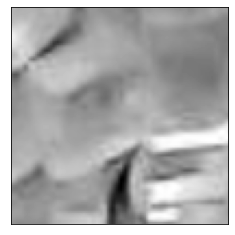

In [17]:
Size = 100
data=np.array(img_graos.iloc[[2],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [18]:
img_graos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,83.117310,79.532974,80.868507,82.737427,83.765762,82.404129,84.418991,88.687141,92.323212,92.336754,83.754181,83.085861,110.045242,126.636871,137.047394,143.374908,144.995026,140.628189,131.904922,122.126770,105.761925,97.644264,101.899437,108.167603,110.955307,112.408562,115.326447,124.206696,133.659210,140.916779,144.544052,148.370697,152.707748,159.078217,162.324005,164.631119,166.990417,167.441330,166.988815,165.547470,...,92.268906,85.810051,78.876434,73.943382,71.781525,71.175674,66.865425,62.251896,60.802467,59.091473,51.464432,36.250492,16.465340,5.037420,1.000000,1.571143,1.299616,1.346369,1.770950,1.000000,1.000000,0.564246,0.000000,0.000000,0.083799,1.000000,1.000000,1.290503,2.000000,1.944134,1.000000,1.000000,0.737430,0.000000,0.000000,0.000000,0.910614,1.000000,1.117318,2.000000
1,118.536133,121.465469,118.846024,108.021149,100.354431,96.541901,99.239380,102.287933,103.543823,100.535652,98.317093,97.025314,97.823906,98.265823,97.822784,95.738823,92.243225,87.837204,84.113922,80.810287,77.459061,72.632271,68.602470,66.050636,64.767670,65.050629,69.722961,74.908348,75.961388,79.683548,84.746834,89.311813,89.966507,86.888794,85.628265,85.265823,85.666397,83.898735,78.807076,69.097107,...,0.168402,0.751642,1.825028,3.415158,2.761416,0.892485,0.632911,0.632911,0.632911,0.632911,0.160231,0.000000,0.000000,0.000000,0.000000,0.018587,0.631469,1.288095,1.176574,0.113924,0.000000,0.000000,0.056081,0.632911,0.112162,0.000000,0.000000,0.016023,0.776959,1.080115,1.451690,1.265823,1.265823,1.265823,1.265823,1.265823,1.265823,1.265823,1.195161,1.000000
2,191.927063,189.379562,185.627594,183.620438,185.058090,186.190140,186.270065,186.970810,187.467209,186.897110,185.656952,182.897812,181.380463,181.270081,182.474457,185.613144,187.423370,188.270065,187.512344,186.708038,185.696411,185.160522,184.016937,183.096603,182.768219,179.467133,172.394165,161.941605,152.611053,140.713989,128.457611,123.842133,125.754112,142.588898,155.313858,162.337906,165.503662,166.000000,165.686127,164.842285,...,133.510742,127.513290,148.660782,167.271469,171.186432,172.968521,173.654541,174.403641,174.963501,173.170135,169.628601,166.325378,164.288620,166.174805,169.959610,175.332520,180.927490,183.993408,189.100586,194.562057,196.810211,196.080292,197.188492,198.386856,199.868622,201.737213,203.547455,204.429749,203.591232,201.567795,198.394867,195.239655,192.942139,190.745010,188.408829,186.240875,184.824554,185.598373,184.540146,182.532791
3,206.312134,197.250824,188.055450,179.982666,175.341064,178.059357,182.324402,182.687866,181.836426,182.403625,185.806183,189.427338,194.392334,201.541992,210.555420,216.760788,220.260132,223.289093,226.502899,228.661957,229.502472,230.491333,232.107910,233.601166,234.117096,233.194504,230.531586,226.475372,224.619507,225.300720,226.129288,227.295914,228.109802,228.265900,227.947998,226.769928,226.019562,225.843933,231.819214,242.351212,...,123.614830,130.886642,137.107224,143.797928,151.830368,161.604706,171.613892,180.965302,187.584930,192.075150,195.924713,198.354736,199.589600,200.513977,199.566467,197.943909,198.995834,201.084778,206.008499,215.942810,230.579880,245.128845,243.219666,225.798309,191.081757,132.677795,105.305527,102.585289,119.940994,141.554947,153.437347,156.673126,157.136780,155.763947,153.982864,156.277771,157.151337,156.156189,154.041611,151.843933
4,179.844666,181.807693,182.957092,185.153839,188.091721,190.017746,190.856506,190.600601,189.641998,188.683426,187.708588,187.615387,188.153839,188.650894,190.208572,192.221893,194.923065,197.985214,200.374268,203.230759,206.346146,207.801773,209.730759,213.653839,217.844650,219.618332,210.423065,202.346146,196.275146,191.122757,1

In [19]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

2218.486009622107

In [20]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3,206.312134,197.250824,188.05545,179.982666,175.341064,178.059357,182.324402,182.687866,181.836426,182.403625,185.806183,189.427338,194.392334,201.541992,210.55542,216.760788,220.260132,223.289093,226.502899,228.661957,229.502472,230.491333,232.10791,233.601166,234.117096,233.194504,230.531586,226.475372,224.619507,225.30072,226.129288,227.295914,228.109802,228.2659,227.947998,226.769928,226.019562,225.843933,231.819214,242.351212,...,123.61483,130.886642,137.107224,143.797928,151.830368,161.604706,171.613892,180.965302,187.58493,192.07515,195.924713,198.354736,199.5896,200.513977,199.566467,197.943909,198.995834,201.084778,206.008499,215.94281,230.57988,245.128845,243.219666,225.798309,191.081757,132.677795,105.305527,102.585289,119.940994,141.554947,153.437347,156.673126,157.13678,155.763947,153.982864,156.277771,157.151337,156.156189,154.041611,151.843933


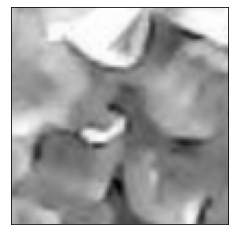

In [21]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

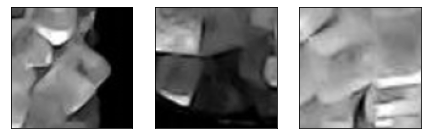

In [22]:
Num = 3
Size=100
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [23]:
print(np.random.rand(1,3))

[[0.64544046 0.59868397 0.13475735]]
